<a href="https://colab.research.google.com/github/Epic-shit-ius/myFirstGitRepository/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***WORK FLOW***

Dataset -->Image Processing -->Train-Test Split --> CNN --> Evaluation


In [1]:
!pip install kaggle

In [2]:
#Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Face Mask Dataset**

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 96.4MB/s]
100% 163M/163M [00:01<00:00, 88.8MB/s]


In [6]:
#Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3198.jpg', 'with_mask_918.jpg', 'with_mask_2801.jpg', 'with_mask_2630.jpg', 'with_mask_3032.jpg']
['with_mask_430.jpg', 'with_mask_2768.jpg', 'with_mask_803.jpg', 'with_mask_2441.jpg', 'with_mask_1017.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1429.jpg', 'without_mask_3198.jpg', 'without_mask_764.jpg', 'without_mask_2975.jpg', 'without_mask_1532.jpg']
['without_mask_2907.jpg', 'without_mask_727.jpg', 'without_mask_996.jpg', 'without_mask_3267.jpg', 'without_mask_2089.jpg']


In [11]:
print('Number of images with masks :', len(with_mask_files))
print('Number of images without masks :', len(without_mask_files))

Number of images with masks : 3725
Number of images without masks : 3828


**Creating labels for the two Class of Images**

with mask --> 1

without mask --> 0

In [13]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

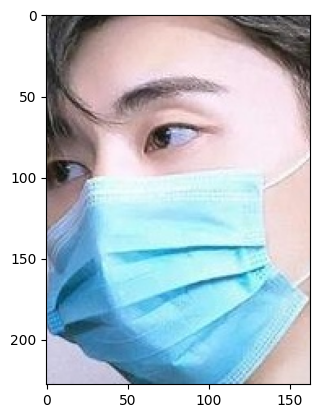

In [20]:
# Displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

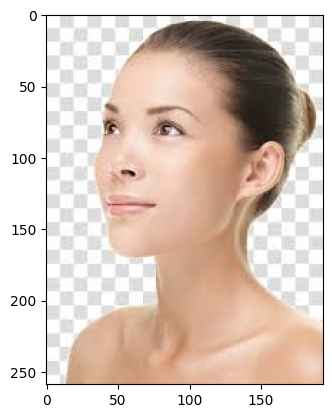

In [22]:
# Displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize images

2. Convert the images into numpy arrays

In [24]:
#Convert the images into numoy arrays

with_mask_path = '/content/data/with_mask/'

data= []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [25]:
type(data)

list

In [26]:
len(data)

7553

array([[[254, 253, 249],
        [254, 253, 249],
        [254, 253, 249],
        ...,
        [255, 251, 248],
        [255, 251, 248],
        [255, 251, 248]],

       [[254, 253, 249],
        [254, 253, 249],
        [254, 253, 249],
        ...,
        [255, 251, 248],
        [255, 251, 248],
        [255, 251, 248]],

       [[254, 253, 249],
        [254, 253, 249],
        [254, 253, 249],
        ...,
        [255, 251, 248],
        [255, 251, 248],
        [255, 251, 248]],

       ...,

       [[220, 200, 194],
        [214, 195, 187],
        [201, 182, 173],
        ...,
        [216, 198, 188],
        [202, 183, 172],
        [226, 208, 197]],

       [[220, 201, 194],
        [215, 196, 189],
        [204, 185, 178],
        ...,
        [232, 213, 206],
        [202, 181, 174],
        [223, 204, 196]],

       [[221, 202, 195],
        [216, 197, 190],
        [209, 190, 183],
        ...,
        [244, 225, 218],
        [208, 188, 181],
        [215, 196, 189]]], dtype=uint8)
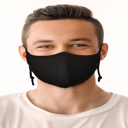

In [27]:
data[0]

In [28]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(128, 128, 3)

In [31]:
# Converting image list and label list to numpy arrays

X =np.array(data)
Y =np.array(labels)

In [32]:
type(X)

numpy.ndarray

In [33]:
type(Y)

numpy.ndarray

In [34]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [35]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state =2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [42]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[144, 145, 146],
        [  0,   0,   0],
        [  8,  13,   5],
        ...,
        [188, 183, 175],
        [191, 188, 180],
        [174, 175, 171]],

       [[144, 145, 144],
        [  0,   0,   0],
        [  5,  10,   4],
        ...,
        [190, 183, 177],
        [189, 186, 181],
        [179, 182, 180]],

       [[145, 145, 143],
        [  0,   0,   0],
        [  5,   7,   4],
        ...,
        [190, 182, 177],
        [197, 195, 193],
        [180, 184, 184]],

       ...,

       [[141, 140, 139],
        [ 30,  33,  37],
        [153, 167, 172],
        ...,
        [ 22,  53,  60],
        [ 16,  44,  50],
        [ 15,  42,  51]],

       [[141, 140, 140],
        [ 39,  42,  48],
        [165, 179, 185],
        ...,
        [  0,   6,   6],
        [  0,   2,   2],
        [  0,   6,   7]],

       [[140, 139, 141],
        [ 73,  76,  84],
        [157, 169, 177],
        ...,
        [ 58,  79,  80],
        [ 66,  85,  86],
        [ 70,  92,  93]]], dtype=uint8)
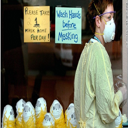

In [39]:
X_train[0]

In [43]:
X_train_scaled[0]

array([[[0.56470588, 0.56862745, 0.57254902],
        [0.        , 0.        , 0.        ],
        [0.03137255, 0.05098039, 0.01960784],
        ...,
        [0.7372549 , 0.71764706, 0.68627451],
        [0.74901961, 0.7372549 , 0.70588235],
        [0.68235294, 0.68627451, 0.67058824]],

       [[0.56470588, 0.56862745, 0.56470588],
        [0.        , 0.        , 0.        ],
        [0.01960784, 0.03921569, 0.01568627],
        ...,
        [0.74509804, 0.71764706, 0.69411765],
        [0.74117647, 0.72941176, 0.70980392],
        [0.70196078, 0.71372549, 0.70588235]],

       [[0.56862745, 0.56862745, 0.56078431],
        [0.        , 0.        , 0.        ],
        [0.01960784, 0.02745098, 0.01568627],
        ...,
        [0.74509804, 0.71372549, 0.69411765],
        [0.77254902, 0.76470588, 0.75686275],
        [0.70588235, 0.72156863, 0.72156863]],

       ...,

       [[0.55294118, 0.54901961, 0.54509804],
        [0.11764706, 0.12941176, 0.14509804],
        [0.6       , 0

***Building A Convolutional Neural Network(CNN)***

In [44]:
import tensorflow as tf
from tensorflow import keras

In [46]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [47]:
# Compile the Neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [48]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs =5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.4788 - acc: 0.7751 - val_loss: 0.3051 - val_acc: 0.8926
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3051 - acc: 0.8825 - val_loss: 0.2425 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2370 - acc: 0.9071 - val_loss: 0.2261 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1913 - acc: 0.9281 - val_loss: 0.1934 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1549 - acc: 0.9406 - val_loss: 0.2181 - val_acc: 0.9107


**Model Evaluation**

In [49]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy : ', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2290 - acc: 0.9153
Test Accuracy :  0.9152879118919373


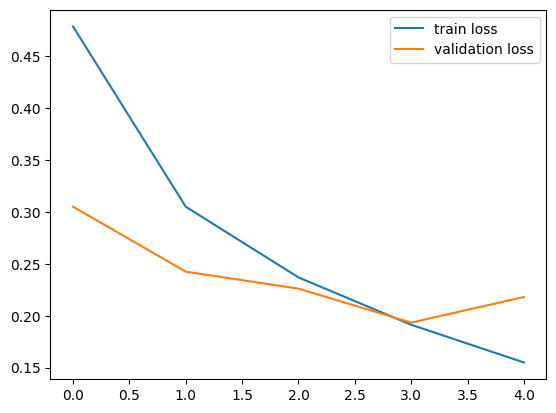

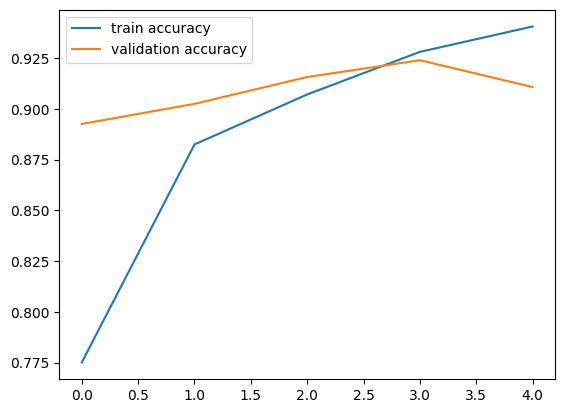

In [51]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the Image to be predicted: /content/testing image.webp


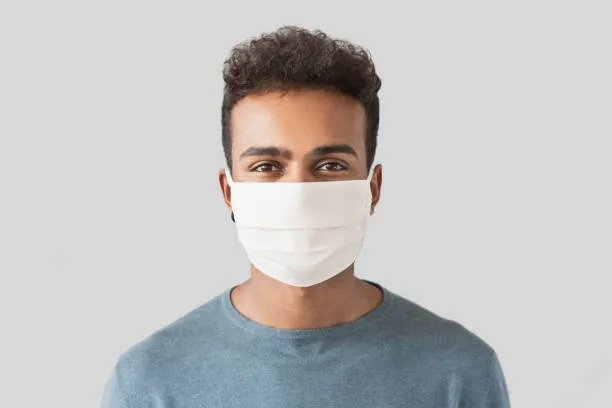

1/1 [==============================] - 0s 337ms/step
[[0.4115011 0.4913155]]
1
The person in the image is wearing mask


In [52]:
input_image_path = input('Path of the Image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped= np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label ==1:

  print('The person in the image is wearing mask')

else:

  print('The person in the image is not wearing mask')